# Day 8 Lesson

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

In [ ]:
africaDF = pd.read_csv('sample_data/african_crises.csv') 
africaDF

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


## Conducting an F-test

In [ ]:
modelUnrestricted = smf.ols('exch_usd ~ year + inflation_annual_cpi + domestic_debt_in_default + sovereign_external_debt_default + inflation_crises', data = africaDF).fit()
print(modelUnrestricted.summary())

                            OLS Regression Results                            
Dep. Variable:               exch_usd   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     74.06
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           1.53e-66
Time:                        20:45:59   Log-Likelihood:                -6334.5
No. Observations:                1059   AIC:                         1.268e+04
Df Residuals:                    1053   BIC:                         1.271e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [ ]:
modelRestricted = smf.ols('exch_usd ~ year + inflation_annual_cpi', data = africaDF).fit()
print(modelRestricted.summary())

                            OLS Regression Results                            
Dep. Variable:               exch_usd   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     35.10
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           1.75e-15
Time:                        20:45:59   Log-Likelihood:                -6460.0
No. Observations:                1059   AIC:                         1.293e+04
Df Residuals:                    1056   BIC:                         1.294e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1589.2900 

In [ ]:
SSR_ur = sum(modelUnrestricted.resid**2)
SSR_r = sum(modelRestricted.resid**2)
q = 3 #Number of elements in family we are testing.
n = 1059
k = 5 # q + remaining elements in regression. Note the - 1 for intercept
dfd = n-k-1   

In [ ]:
f_score = ( (SSR_r - SSR_ur)/q ) / ( SSR_ur/(dfd) )
f_score

93.86024961220349

In [ ]:
1 - st.f.cdf(f_score, q, dfd)

1.1102230246251565e-16

So with this extremely small p value, what do we do with:

*   H0: The variables are jointly insignificant.
*   HA: The variables are jointly significant.

Hint: Look at earlier p-values and what they are used for.


## A second example, using RNG values.

In [ ]:
africaDF['r1'] = np.random.randint(1,100,len(africaDF.iloc[:,1]))
africaDF['r2'] = np.random.randint(1,100,len(africaDF.iloc[:,1]))
africaDF['r3'] = np.random.randint(1,100,len(africaDF.iloc[:,1]))
africaDF['r4'] = np.random.randint(1,100,len(africaDF.iloc[:,1]))
africaDF['r5'] = np.random.randint(1,100,len(africaDF.iloc[:,1]))

In [ ]:
modelUnrestricted = smf.ols('exch_usd ~ year + inflation_annual_cpi + r1 + r2 + r3+ r4 + r5', data = africaDF).fit()
print(modelUnrestricted.summary())

                            OLS Regression Results                            
Dep. Variable:               exch_usd   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     10.70
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           4.56e-13
Time:                        20:45:59   Log-Likelihood:                -6457.6
No. Observations:                1059   AIC:                         1.293e+04
Df Residuals:                    1051   BIC:                         1.297e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1568.8248 

In [ ]:
modelRestricted = smf.ols('exch_usd ~ year + inflation_annual_cpi', data = africaDF).fit()
print(modelRestricted.summary())

                            OLS Regression Results                            
Dep. Variable:               exch_usd   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     35.10
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           1.75e-15
Time:                        20:45:59   Log-Likelihood:                -6460.0
No. Observations:                1059   AIC:                         1.293e+04
Df Residuals:                    1056   BIC:                         1.294e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1589.2900 

In [ ]:
SSR_ur = sum(modelUnrestricted.resid**2)
SSR_r = sum(modelRestricted.resid**2)
q = 5 #Number of elements in family we are testing.
n = 1059
k = 7 # q + remaining elements in regression. Note the - 1 for intercept
dfd = n-k-1   

In [ ]:
f_score = ( (SSR_r - SSR_ur)/q ) / ( SSR_ur/(dfd) )
f_score

0.945179399949892

In [ ]:
1 - st.f.cdf(f_score, q, dfd)

0.4507370507967048

So with this extremely large p value, what do we do with:

*   H0: The variables are jointly insignificant.
*   HA: The variables are jointly significant.

Hint: Look at earlier p-values and what they are used for.

# Multicolinearity

Multicolinearity is a major problem in regression. However, the base python error is wildly insufficient to indicate the problem.

<Axes: xlabel='r1', ylabel='inv_r1'>

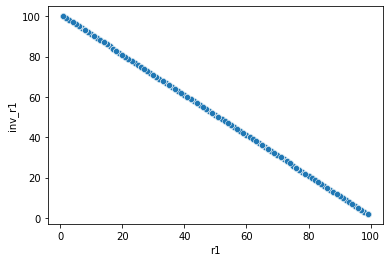

In [ ]:
africaDF['inv_r1'] = 101 - africaDF['r1']
sns.scatterplot(x = africaDF['r1'],y = africaDF['inv_r1'])

In [ ]:
modelRestricted = smf.ols('exch_usd ~ inv_r1 + r1', data = africaDF).fit()
print(modelRestricted.summary())

                            OLS Regression Results                            
Dep. Variable:               exch_usd   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3176
Date:                Wed, 22 Mar 2023   Prob (F-statistic):              0.573
Time:                        20:45:59   Log-Likelihood:                -6493.9
No. Observations:                1059   AIC:                         1.299e+04
Df Residuals:                    1057   BIC:                         1.300e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0085      0.001     12.601      0.0

The error message here is: 

The smallest eigenvalue is ***1.75e-28***. This might indicate that there are strong multicollinearity problems or that the design matrix is singular.

Compare to earlier:

The condition number is large, ***4.12e+07***. This might indicate that there are
strong multicollinearity or other numerical problems.

## VIF Test

There is a test to determine if multicolinearity is a problem, here is the VIF test, "**V**ariance **I**nflation **F**actor".  I will be conducting it manually here:

In [ ]:
modelVIF = smf.ols('inv_r1 ~ r1', data = africaDF).fit()
print(modelVIF.summary())

                            OLS Regression Results                            
Dep. Variable:                 inv_r1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.109e+33
Date:                Wed, 22 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:45:59   Log-Likelihood:                 31529.
No. Observations:                1059   AIC:                        -6.305e+04
Df Residuals:                    1057   BIC:                        -6.304e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    101.0000   1.77e-15   5.69e+16      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/usr/local/lib/python3.9/dist-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1633: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1738: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic canc

Finally, a real error. Other software will would have issued something for the multicolinearity set of estimations.

In [ ]:
# vifScore = 1/(1-R_squared)
vifScore = 1/(1-1.000)
# vifScore = 1/0, infinity/NAN

If the VIF score is greater than 5, we likely have a problem.
This is a rule of thumb, note that: 4.9999 does not mean we are problem-free, we should still flag something is wrong at that point.  

# Activities

Do any 3:

1.   Show me your notes, something formatted in a blowout manner so I can see you have explored.
2.   Take a manual F-test on the data in california_housing_test.csv, show all steps. You may pick any unique family of variables to use.
3.   Conduct a manual VIF test using the data in california_housing_test.csv, determine if a single variable is multicolinear with the remainder of the regressors, you may pick the regressors.
4.   Conduct a VIF test using all of the regressors in the california_housing_test.csv, Hint: check your Zybooks work.


In [24]:
stockDF = pd.read_csv('sample_data/CHWY.csv') 
stockDF

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-14,36.000000,41.340000,32.740002,34.990002,34.990002,69671400
1,2019-06-17,34.720001,35.360001,32.669998,33.700001,33.700001,15403000
2,2019-06-18,34.500000,37.470001,34.349998,37.360001,37.360001,11022800
3,2019-06-19,37.599998,37.630001,34.250000,34.900002,34.900002,11163600
4,2019-06-20,35.110001,35.549999,33.599998,34.230000,34.230000,7901000
...,...,...,...,...,...,...,...
944,2023-03-15,37.720001,38.220001,36.020000,38.160000,38.160000,5264100
945,2023-03-16,38.040001,38.959999,36.617001,38.740002,38.740002,4825500
946,2023-03-17,39.180000,40.240002,38.320000,38.610001,38.610001,4714200
947,2023-03-20,38.310001,38.500000,37.294998,38.000000,38.000000,4388900


In [27]:
stockDF['adjClose'] = stockDF['Adj Close']
stockDF

,Date,Open,High,Low,Close,Adj Close,Volume,adjClose
0,2019-06-14,36.000000,41.340000,32.740002,34.990002,34.990002,69671400,34.990002
1,2019-06-17,34.720001,35.360001,32.669998,33.700001,33.700001,15403000,33.700001
2,2019-06-18,34.500000,37.470001,34.349998,37.360001,37.360001,11022800,37.360001
3,2019-06-19,37.599998,37.630001,34.250000,34.900002,34.900002,11163600,34.900002
4,2019-06-20,35.110001,35.549999,33.599998,34.230000,34.230000,7901000,34.230000
...,...,...,...,...,...,...,...,...
944,2023-03-15,37.720001,38.220001,36.020000,38.160000,38.160000,5264100,38.160000
945,2023-03-16,38.040001,38.959999,36.617001,38.740002,38.740002,4825500,38.740002
946,2023-03-17,39.180000,40.240002,38.320000,38.610001,38.610001,4714200,38.610001
947,2023-03-20,38.310001,38.500000,37.294998,38.000000,38.000000,4388900,38.000000


In [29]:
stockReg = smf.ols('High ~ Volume + Open + Close + adjClose', data = stockDF).fit()
print(stockReg.summary())

                            OLS Regression Results                            
Dep. Variable:                   High   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.611e+05
Date:                Wed, 22 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:58:13   Log-Likelihood:                -1123.2
No. Observations:                 949   AIC:                             2254.
Df Residuals:                     945   BIC:                             2274.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1313      0.072     -1.815      0.0

In [30]:
stockRegVIF = smf.ols('Close ~ Volume + Open + adjClose', data = stockDF).fit()
print(stockRegVIF.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.315e+31
Date:                Thu, 23 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:01:45   Log-Likelihood:                 27418.
No. Observations:                 949   AIC:                        -5.483e+04
Df Residuals:                     945   BIC:                        -5.481e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.505e-14   6.28e-15     -3.988      0.0

In [31]:
vif = 1/(1-1.000) #R2 from second regression

ZeroDivisionError: ignored